In [69]:
import pandas as pd
import re
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from Bio import SeqIO
from Bio import pairwise2
import itertools
import json

In [5]:
data = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/b_uni_genome.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data

,ref,prodigal,CDS,start,end,row,strand,row2,annot
0,contig_4,INFERNAL:1.1.2,ncRNA,1642844,1645710,.,+,.,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...
1,contig_4,INFERNAL:1.1.2,ncRNA,3830278,3833144,.,-,.,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...
2,contig_4,INFERNAL:1.1.2,ncRNA,490503,493369,.,+,.,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...
3,contig_4,INFERNAL:1.1.2,ncRNA,3136801,3139667,.,-,.,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...
4,contig_4,INFERNAL:1.1.2,ncRNA,1640830,1642352,.,+,.,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...
...,...,...,...,...,...,...,...,...,...
3877,contig_4,Prodigal:002006,CDS,4678480,4681635,.,+,0,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...
3878,contig_4,Prodigal:002006,CDS,4681632,4683050,.,+,0,ID=bc2018--bc2018___80_03909;inference=ab init...
3879,contig_4,Prodigal:002006,CDS,4683091,4684353,.,+,0,ID=bc2018--bc2018___80_03910;inference=ab init...
3880,contig_4,Prodigal:002006,CDS,4684812,4687811,.,-,0,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...


In [6]:
data = data[['annot']]

In [11]:
transc_dict = {}
for _,row in data.iterrows():
    text=row.annot
    ID = re.compile(r'ID=([.A-Za-z0-9_-]+)') 
    name = re.compile(r'Name=([,:A-Za-z0-9_-]+)') 
    findid = ID.findall(text.strip())[0]
    try:
        findname = name.findall(text.strip())[0]
    except:
        findname = np.nan
        
    transc_dict.update({findid:findname})
    
transc_dict

{'contig_4_ncRNA1': nan,
 'contig_4_ncRNA2': nan,
 'contig_4_ncRNA3': nan,
 'contig_4_ncRNA4': nan,
 'contig_4_ncRNA5': nan,
 'contig_4_ncRNA6': nan,
 'contig_4_ncRNA7': nan,
 'contig_4_ncRNA8': nan,
 'contig_4_ncRNA9': nan,
 'contig_4_ncRNA10': nan,
 'contig_4_ncRNA11': nan,
 'contig_4_ncRNA12': nan,
 'contig_4_ncRNA13': nan,
 'contig_4_ncRNA14': nan,
 'contig_4_ncRNA15': nan,
 'contig_4_ncRNA16': nan,
 'contig_4_ncRNA17': nan,
 'contig_4_ncRNA18': nan,
 'contig_4_ncRNA19': nan,
 'contig_4_ncRNA20': nan,
 'contig_4_ncRNA21': nan,
 'contig_4_ncRNA22': nan,
 'contig_4_ncRNA23': nan,
 'contig_4_ncRNA24': nan,
 'contig_4_ncRNA25': nan,
 'contig_4_ncRNA26': nan,
 'contig_4_ncRNA27': nan,
 'contig_4_ncRNA28': nan,
 'contig_4_ncRNA29': nan,
 'contig_4_ncRNA30': nan,
 'contig_4_ncRNA31': nan,
 'contig_4_ncRNA32': nan,
 'contig_4_ncRNA33': nan,
 'contig_4_ncRNA34': nan,
 'contig_4_ncRNA35': nan,
 'contig_4_ncRNA36': nan,
 'contig_4_ncRNA37': nan,
 'contig_4_ncRNA38': nan,
 'contig_4_ncRNA39': 

In [12]:
id_name = pd.DataFrame.from_dict(transc_dict, orient='index', columns=['name'])
id_name = id_name.reset_index()
id_name

,index,name
0,contig_4_ncRNA1,NaN
1,contig_4_ncRNA2,NaN
2,contig_4_ncRNA3,NaN
3,contig_4_ncRNA4,NaN
4,contig_4_ncRNA5,NaN
...,...,...
3877,bc2018--bc2018___80_03908,mdtB_2
3878,bc2018--bc2018___80_03909,NaN
3879,bc2018--bc2018___80_03910,NaN
3880,bc2018--bc2018___80_03911,secD


In [13]:
id_name = id_name.dropna()
id_name

,index,name
50,bc2018--bc2018___80_00018,hup_1
51,bc2018--bc2018___80_00019,argS
52,bc2018--bc2018___80_00020,topA
54,bc2018--bc2018___80_00022,cpoB
55,bc2018--bc2018___80_00023,nudC_1
...,...,...
3875,bc2018--bc2018___80_03906,rhaS_9
3876,bc2018--bc2018___80_03907,ttgD_2
3877,bc2018--bc2018___80_03908,mdtB_2
3880,bc2018--bc2018___80_03911,secD


In [30]:
data = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/b_uni_genome.gff', comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data

,ref,prodigal,CDS,start,end,row,strand,row2,annot
0,contig_4,INFERNAL:1.1.2,ncRNA,1642844,1645710,.,+,.,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...
1,contig_4,INFERNAL:1.1.2,ncRNA,3830278,3833144,.,-,.,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...
2,contig_4,INFERNAL:1.1.2,ncRNA,490503,493369,.,+,.,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...
3,contig_4,INFERNAL:1.1.2,ncRNA,3136801,3139667,.,-,.,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...
4,contig_4,INFERNAL:1.1.2,ncRNA,1640830,1642352,.,+,.,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...
...,...,...,...,...,...,...,...,...,...
3877,contig_4,Prodigal:002006,CDS,4678480,4681635,.,+,0,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...
3878,contig_4,Prodigal:002006,CDS,4681632,4683050,.,+,0,ID=bc2018--bc2018___80_03909;inference=ab init...
3879,contig_4,Prodigal:002006,CDS,4683091,4684353,.,+,0,ID=bc2018--bc2018___80_03910;inference=ab init...
3880,contig_4,Prodigal:002006,CDS,4684812,4687811,.,-,0,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...


In [31]:
data = data[['ref','start', 'end', 'annot']]
data

,ref,start,end,annot
0,contig_4,1642844,1645710,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...
1,contig_4,3830278,3833144,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...
2,contig_4,490503,493369,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...
3,contig_4,3136801,3139667,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...
4,contig_4,1640830,1642352,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...
...,...,...,...,...
3877,contig_4,4678480,4681635,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...
3878,contig_4,4681632,4683050,ID=bc2018--bc2018___80_03909;inference=ab init...
3879,contig_4,4683091,4684353,ID=bc2018--bc2018___80_03910;inference=ab init...
3880,contig_4,4684812,4687811,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...


In [32]:
data['index'] = data['annot'].str.split(';', expand=True)[0]
data

/tmp/ipykernel_21855/597235556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = data['annot'].str.split(';', expand=True)[0]


,ref,start,end,annot,index
0,contig_4,1642844,1645710,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...,ID=contig_4_ncRNA1
1,contig_4,3830278,3833144,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...,ID=contig_4_ncRNA2
2,contig_4,490503,493369,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...,ID=contig_4_ncRNA3
3,contig_4,3136801,3139667,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...,ID=contig_4_ncRNA4
4,contig_4,1640830,1642352,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...,ID=contig_4_ncRNA5
...,...,...,...,...,...
3877,contig_4,4678480,4681635,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...,ID=bc2018--bc2018___80_03908
3878,contig_4,4681632,4683050,ID=bc2018--bc2018___80_03909;inference=ab init...,ID=bc2018--bc2018___80_03909
3879,contig_4,4683091,4684353,ID=bc2018--bc2018___80_03910;inference=ab init...,ID=bc2018--bc2018___80_03910
3880,contig_4,4684812,4687811,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...,ID=bc2018--bc2018___80_03911


In [33]:
data['index'] = data['index'].str.strip('ID=')
data

/tmp/ipykernel_21855/127018808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = data['index'].str.strip('ID=')


,ref,start,end,annot,index
0,contig_4,1642844,1645710,ID=contig_4_ncRNA1;inference=Rfam:14.6;locus_t...,contig_4_ncRNA1
1,contig_4,3830278,3833144,ID=contig_4_ncRNA2;inference=Rfam:14.6;locus_t...,contig_4_ncRNA2
2,contig_4,490503,493369,ID=contig_4_ncRNA3;inference=Rfam:14.6;locus_t...,contig_4_ncRNA3
3,contig_4,3136801,3139667,ID=contig_4_ncRNA4;inference=Rfam:14.6;locus_t...,contig_4_ncRNA4
4,contig_4,1640830,1642352,ID=contig_4_ncRNA5;inference=Rfam:14.6;locus_t...,contig_4_ncRNA5
...,...,...,...,...,...
3877,contig_4,4678480,4681635,ID=bc2018--bc2018___80_03908;Name=mdtB_2;gene=...,bc2018--bc2018___80_03908
3878,contig_4,4681632,4683050,ID=bc2018--bc2018___80_03909;inference=ab init...,bc2018--bc2018___80_03909
3879,contig_4,4683091,4684353,ID=bc2018--bc2018___80_03910;inference=ab init...,bc2018--bc2018___80_03910
3880,contig_4,4684812,4687811,ID=bc2018--bc2018___80_03911;Name=secD;gene=se...,bc2018--bc2018___80_03911


In [34]:
ebi = pd.merge(id_name[['index', 'name']], data[['index', 'ref','start', 'end']], on='index')
ebi

,index,name,ref,start,end
0,bc2018--bc2018___80_00018,hup_1,contig_4,4032,4298
1,bc2018--bc2018___80_00019,argS,contig_4,4454,6271
2,bc2018--bc2018___80_00020,topA,contig_4,6413,8815
3,bc2018--bc2018___80_00022,cpoB,contig_4,10608,13652
4,bc2018--bc2018___80_00023,nudC_1,contig_4,13757,14296
...,...,...,...,...,...
1540,bc2018--bc2018___80_03906,rhaS_9,contig_4,4676389,4677270
1541,bc2018--bc2018___80_03907,ttgD_2,contig_4,4677419,4678480
1542,bc2018--bc2018___80_03908,mdtB_2,contig_4,4678480,4681635
1543,bc2018--bc2018___80_03911,secD,contig_4,4684812,4687811


In [35]:
ebi['gene'] = ebi['name'].str.split('_', expand=True)[0]
ebi

,index,name,ref,start,end,gene
0,bc2018--bc2018___80_00018,hup_1,contig_4,4032,4298,hup
1,bc2018--bc2018___80_00019,argS,contig_4,4454,6271,argS
2,bc2018--bc2018___80_00020,topA,contig_4,6413,8815,topA
3,bc2018--bc2018___80_00022,cpoB,contig_4,10608,13652,cpoB
4,bc2018--bc2018___80_00023,nudC_1,contig_4,13757,14296,nudC
...,...,...,...,...,...,...
1540,bc2018--bc2018___80_03906,rhaS_9,contig_4,4676389,4677270,rhaS
1541,bc2018--bc2018___80_03907,ttgD_2,contig_4,4677419,4678480,ttgD
1542,bc2018--bc2018___80_03908,mdtB_2,contig_4,4678480,4681635,mdtB
1543,bc2018--bc2018___80_03911,secD,contig_4,4684812,4687811,secD


In [36]:
ebi.groupby('gene').count().sort_values(by='start', ascending=False)

,index,name,ref,start,end
gene,,,,,
rcsC,39,39,39,39,39
susC,16,16,16,16,16
xerC,15,15,15,15,15
lacZ,12,12,12,12,12
btuB,12,12,12,12,12
...,...,...,...,...,...
kdsD,1,1,1,1,1
kduD,1,1,1,1,1
kduI,1,1,1,1,1


In [48]:
# drop all unique values

ebi = ebi[ebi.duplicated(subset=['gene'], keep=False)]
ebi

,index,name,ref,start,end,gene
0,bc2018--bc2018___80_00018,hup_1,contig_4,4032,4298,hup
4,bc2018--bc2018___80_00023,nudC_1,contig_4,13757,14296,nudC
5,bc2018--bc2018___80_00024,dinG_1,contig_4,14403,14894,dinG
8,bc2018--bc2018___80_00041,lacZ_1,contig_4,33041,35692,lacZ
9,bc2018--bc2018___80_00057,cpdA_1,contig_4,59655,60656,cpdA
...,...,...,...,...,...,...
1539,bc2018--bc2018___80_03894,korA_2,contig_4,4654041,4655876,korA
1540,bc2018--bc2018___80_03906,rhaS_9,contig_4,4676389,4677270,rhaS
1541,bc2018--bc2018___80_03907,ttgD_2,contig_4,4677419,4678480,ttgD
1542,bc2018--bc2018___80_03908,mdtB_2,contig_4,4678480,4681635,mdtB


In [29]:
def fragment_extract(fasta, contig, start, end):
    with open(fasta) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            if record.id == contig:
                data = record.seq
    gen_slice = data[start-1:end]
    return gen_slice

In [39]:
fasta_ebi = '/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/b_uni_type_4only.fa'

In [57]:
align_percent = []
for gene in tqdm(set(ebi.gene.to_list())):
    fasta_seq = []
    align_scores = []
    for _,row in ebi.iterrows():
        if row.gene == gene:
            a = fragment_extract(fasta_ebi,row.ref, row.start, row.end)
            fasta_seq.append(a)
    align_pairs = list(itertools.combinations(fasta_seq, 2))
    for i in align_pairs:
        alignments = pairwise2.align.globalxx(i[0],i[1])
        length = len(i[0]) if len(i[0])<len(i[1]) else len(i[1])
        align_scores.append(alignments[0].score/length)
    align_percent.append([gene, align_scores])

  0%|          | 0/213 [00:00<?, ?it/s]

In [58]:
align_percent

[['recQ', [0.727924944812362]],
 ['srpC', [0.7257142857142858]],
 ['alsT', [0.6710914454277286]],
 ['glnA', [0.7764471057884231, 0.7374429223744292, 0.7677977378576181]],
 ['sasA',
  [0.6540504648074369,
   0.6918960244648318,
   0.9568393094289509,
   0.649402390438247,
   0.7384751773049646,
   0.6859229747675962,
   0.6864535768645358,
   0.6597938144329897,
   0.7616201859229748,
   0.7033639143730887,
   0.9475728155339805,
   0.6737864077669903,
   0.750886524822695,
   0.7035598705501618,
   0.7024353120243532,
   0.6721649484536083,
   0.7585760517799353,
   0.9762996941896025,
   0.6926605504587156,
   0.6897163120567376,
   0.7385321100917431,
   0.654434250764526,
   0.6781345565749235,
   0.8065749235474006,
   0.9459287531806616,
   0.99822695035461,
   0.915273132664437,
   0.9809741248097412,
   0.9676975945017182,
   0.8589398023360287,
   0.7579787234042553,
   0.7073791348600509,
   0.7039573820395738,
   0.6776632302405499,
   0.7569974554707379,
   0.799645390070922

In [59]:
len(align_percent) 

213

In [67]:
align_dict = {item[0]: item[1:][0] for item in align_percent}

<AxesSubplot:>

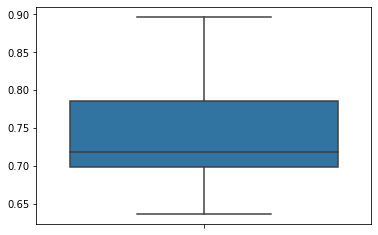

In [73]:
ax = sns.boxplot(y = align_dict['lacZ'])

<AxesSubplot:ylabel='Count'>

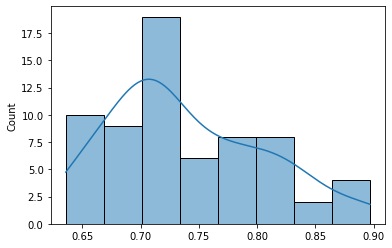

In [78]:
sns.histplot(align_dict['lacZ'], kde=True, stat='count')

<AxesSubplot:>

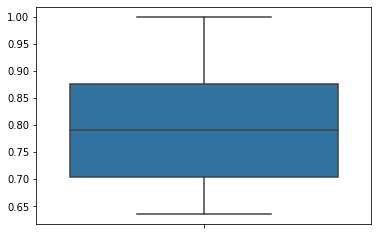

In [79]:
sns.boxplot(y = align_dict['rcsC'])

<AxesSubplot:ylabel='Count'>

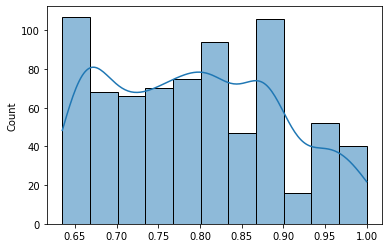

In [80]:
sns.histplot(align_dict['rcsC'], kde=True, stat='count')

In [86]:
with open("align_multicopy.json", "w") as outfile:
    json.dump(align_dict, outfile)